In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tabulate as tabulate
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import re
from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

In [29]:
###Definitionssachen
#WICHTIG: für sim pattern ist die reihenfolge so wie in assignment und hier im programm
#WICHTIG:  für proj pattern ist die reihenfolge die reihenfolge von era5 historical

scenario=""
if scenario=="ssp2_":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="":
    models =["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp1_":
    models=["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp1
          "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
elif scenario=="ssp3_":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1",  #ssp3
          "GFDL-ESM4", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6",  "MPI-ESM1-2-LR", "MRI-ESM2-0", "UKESM1-0-LL"]
elif scenario=="hist":
    models = ["ACCESS-CM2", "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", #ssp5,2
         "GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
         "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
else:
    print("wählen scenario aus")
aufgabe = "Projected patterns"#"Projected patterns"
def styling_specific_cell1(x,row_idx,col_idx):
    color = style_df_cl1.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell2(x,row_idx,col_idx):
    color = style_df_cl2.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell3(x,row_idx,col_idx):
    color = style_df_cl3.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell4(x,row_idx,col_idx):
    color = style_df_cl4.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def styling_specific_cell5(x,row_idx,col_idx):
    color = style_df_cl5.iloc[row_idx, col_idx]
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler
def significance_decider(val,signi, minmax):
        if signi<minmax[4]:
            return 'background-color: darkblue; color: white'
        elif signi>minmax[5]:
            return 'background-color: darkred; color: white'
        elif signi>minmax[4] and signi<minmax[2]:
            return 'background-color: blue; color: white'
        elif signi>minmax[2] and signi<minmax[0]:
            return 'background-color: skyblue; color: black'
        elif signi<minmax[5] and signi>minmax[3]:
            return 'background-color: red; color: black'
        elif signi<minmax[3] and signi>minmax[1]:
            return 'background-color: orange; color: black'
        else:
            return 'background-color: white; color: black'
seas="mjjaso"
months=6
cluster = 5
months_name=[5,6,7,8,9,10]#[5,6,7,8,9,10]#[6,7,8]#
month_len=[31,30,31,31,30,31]#[31,30,31,31,30,31]#[30,31,31]
months_official=["May","June","July","August","September","October"]##["June","July","August"]#
days_per_year=sum(month_len)
years=30
days_per_period=days_per_year*years
zusatz="historical"
years_hist="1985-2014"
years_proj="1985-2014"
years_fut="2070-2099"
area="-90_90"
region="atl"
if region=="paz":
    cl1={}
    cl2={}
    cl3={}
    cl4={}
    cl5={}
else:
    scan={}
    atl={}
    naoplus={}
    naominus={}
    dipol={}
persistence_change_1=[]
persistence_change_2=[]
persistence_change_3=[]
persistence_change_4=[]
persistence_change_5=[]
persistence_hist1=[]
persistence_hist2=[]
persistence_hist3=[]
persistence_hist4=[]
persistence_hist5=[]
counts_hist = {}
counts_fut = {}
occurence_hist = {}
occurence_fut={}
difference_cl1={}
difference_cl2={}
difference_cl3={}
difference_cl4={}
difference_cl5={}

style_dict_cl1 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl1[column_name]= np.array([])
style_dict_cl1['all']=np.array([])

style_dict_cl2 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl2[column_name]= np.array([])
style_dict_cl2['all']=np.array([])

style_dict_cl3 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl3[column_name]= np.array([])
style_dict_cl3['all']=np.array([])

style_dict_cl4 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl4[column_name]= np.array([])
style_dict_cl4['all']=np.array([])

style_dict_cl5 = {}
for month in range(0,months):
    column_name=str(months_official[month])
    style_dict_cl5[column_name]= np.array([])
style_dict_cl5['all']=np.array([])



if aufgabe == 'Projected patterns':
    for model in range(len(models)):
        path_2="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/"
        path="N:/atm_glomod/user/jomuel001/CMIP6_models/"+models[model]+"/AREA."+area+"_89.7849_29.0866/CLUSTER/PLOTS/"
        #datei_signi=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5cluster10PC_high_low.month.signif_bootstrap.txt"
        #datei_minmax=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5cluster10PC_high_low.month.signif_bootstrap_minmaxwhiskers.txt"
        #cluster werden zu era5 zugeordnet
        datei_occ_hist=r"KMEANSslp_hpa_"+models[model]+"_"+years_hist+".N_"+seas+"_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates"
        datei_occ_fut=r"KMEANSslp_hpa_"+scenario+models[model]+"_"+years_fut+".N_"+seas+"_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA5"+years_proj+"slp_hpa_ERA5_"+years_proj+"_"+seas+"_atrbg_aacrm21_remapbnds_unnorm_projectedpattern_5tabcluster_10tabPC_dates"

       # significance=np.array(pd.read_csv(path+datei_signi, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_signi, delimiter=' ')))].reshape(months,cluster)
        #minmaxwhiskers=np.array(pd.read_csv(path+datei_minmax, delimiter=' '))[~np.isnan(np.array(pd.read_csv(path+datei_minmax, delimiter=' ')))].reshape(months,cluster,6)
        occurence_hist['all']=np.loadtxt(path_2+datei_occ_hist, delimiter=' ')[:,3]
        counts_hist['all']=np.bincount(np.round(occurence_hist['all']).astype(int))/(days_per_period)
        #print(counts_hist['all'])
        occurence_fut['all']=np.loadtxt(path_2+datei_occ_fut, delimiter=' ')[:,3]
        arr= occurence_hist['all'].astype('int')
        counts = [[],[],[],[],[]]
        self_following_count = [0]*5
        #print(arr)
        
        # iterate through the array and count self-following counts
        for i in range(len(arr)-1):
            curr_num = arr[i]
            next_num = arr[i+1]
            if next_num == curr_num and next_num % 184 != 0:
                self_following_count[curr_num-1] += 1
                #print(self_following_count)
            else:
                counts[curr_num-1].append(self_following_count[curr_num-1]+1)
                self_following_count[curr_num-1]=0
                self_following_count[next_num-1]=1
        persistence_1_hist=np.mean(counts[0])
        persistence_2_hist=np.mean(counts[1])
        persistence_3_hist=np.mean(counts[2])
        persistence_4_hist=np.mean(counts[3])
        persistence_5_hist=np.mean(counts[4])
        arr= occurence_fut['all'].astype('int')
       # initialize counters for each number and its self-following count
        counts = [[],[],[],[],[]]
        self_following_count = [0] * 5

       # iterate through the array and count self-following counts
        for i in range(len(arr)-1):
           curr_num = arr[i]
           next_num = arr[i+1]
           if next_num == curr_num:
               self_following_count[curr_num-1] += 1
           else:
               counts[curr_num-1].append(self_following_count[curr_num-1]+1)
               self_following_count[curr_num-1]=0
               self_following_count[next_num-1]=1
        persistence_1_fut=np.mean(counts[0])
        persistence_2_fut=np.mean(counts[1])
        persistence_3_fut=np.mean(counts[2])
        persistence_4_fut=np.mean(counts[3])
        persistence_5_fut=np.mean(counts[4])
        
        persistence_change_1.append(persistence_1_fut)
        persistence_change_2.append(persistence_2_fut)
        persistence_change_3.append(persistence_3_fut)
        persistence_change_4.append(persistence_4_fut)
        persistence_change_5.append(persistence_5_fut)
        persistence_hist1.append(persistence_1_hist)
        persistence_hist2.append(persistence_2_hist)
        persistence_hist3.append(persistence_3_hist)
        persistence_hist4.append(persistence_4_hist)
        persistence_hist5.append(persistence_5_hist)
        
        




            


In [30]:
ssp5_scan=persistence_change_1
ssp5_atl=persistence_change_2
ssp5_naoplus=persistence_change_3
ssp5_naominus=persistence_change_4
ssp5_dipol=persistence_change_5

In [28]:
ssp3_scan=persistence_change_1
ssp3_atl=persistence_change_2
ssp3_naoplus=persistence_change_3
ssp3_naominus=persistence_change_4
ssp3_dipol=persistence_change_5

In [25]:
ssp2_scan=persistence_change_1
ssp2_atl=persistence_change_2
ssp2_naoplus=persistence_change_3
ssp2_naominus=persistence_change_4
ssp2_dipol=persistence_change_5

In [23]:
ssp1_scan=persistence_change_1
ssp1_atl=persistence_change_2
ssp1_naoplus=persistence_change_3
ssp1_naominus=persistence_change_4
ssp1_dipol=persistence_change_5

In [26]:
hist_scan=persistence_hist1
hist_atl=persistence_hist2
hist_naoplus=persistence_hist3
hist_naominus=persistence_hist4
hist_dipol=persistence_hist5

[1]


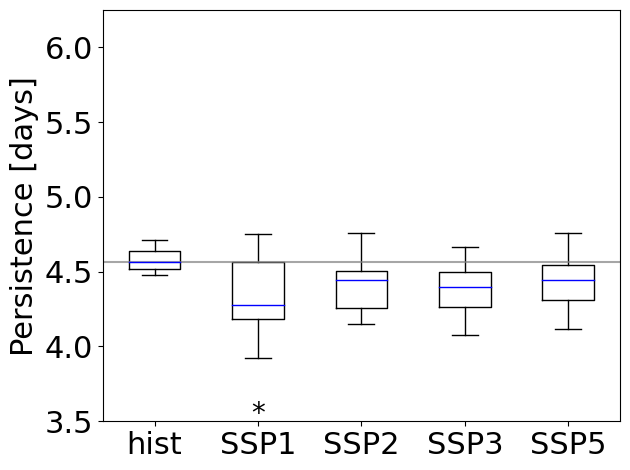

In [35]:
import scipy.stats as stats
t_stat, p_value_1 = stats.ttest_ind(hist_scan,hist_scan, equal_var=False)
t_stat, p_value_2 = stats.ttest_ind(hist_scan,ssp1_scan, equal_var=False)
t_stat, p_value_3 = stats.ttest_ind(hist_scan,ssp2_scan, equal_var=False)
t_stat, p_value_4 = stats.ttest_ind(hist_scan,ssp3_scan, equal_var=False)
t_stat, p_value_5 = stats.ttest_ind(hist_scan,ssp5_scan, equal_var=False)

values=np.array([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5])
threshold=0.01
smaller_indices = [index for index, value in enumerate(values) if value < threshold]
print(smaller_indices)
    
    
bp=plt.boxplot(x=[np.array(hist_scan),np.array(ssp1_scan),np.array(ssp2_scan),np.array(ssp3_scan),np.array(ssp5_scan)], labels=["hist","SSP1","SSP2","SSP3","SSP5"], showfliers=False,medianprops=dict(color="b")) #["SCAN","ATL-","NAO+","NAO-","DIPOL"]
plt.ylabel('Persistence [days]',fontsize=22)
#plt.title("Whisker plot of multi-model distribution of ACR persistence of future reference \n periods with respect to historical regime frequency, JJA")
plt.hlines(np.median(hist_scan),0,6,color='grey', alpha=0.7)
# plt.hlines(74,1.8,2.2,color='b', alpha=0.9, linestyle="--")
# plt.hlines(4.63,2.8,3.2,color='b', alpha=0.9, linestyle="--")
# plt.hlines(5.22,3.8,4.2,color='b', alpha=0.9, linestyle="--")
# plt.hlines(4.03,4.8,5.2,color='b', alpha=0.9, linestyle="--")

plt.xlim(0.5,5.5)
plt.ylim(3.5,6.25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
welch=3.55
try:
    plt.text(smaller_indices[0]+1, welch, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[1]+1, welch, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[2]+1, welch, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[3]+1, welch, "*", ha='center', va='center', fontsize=20)
except:
    pass
try:
    plt.text(smaller_indices[4]+1, welch, "*", ha='center', va='center', fontsize=20)#
except:
    pass
plt.tight_layout()
plt.savefig("N:/atm_glomod/user/jomuel001/auswertung/BOOTSTRAP/Daten_CMIP6/scanpersistence_"+seas+"_"+region+"_"+aufgabe+"his.png",dpi=300)

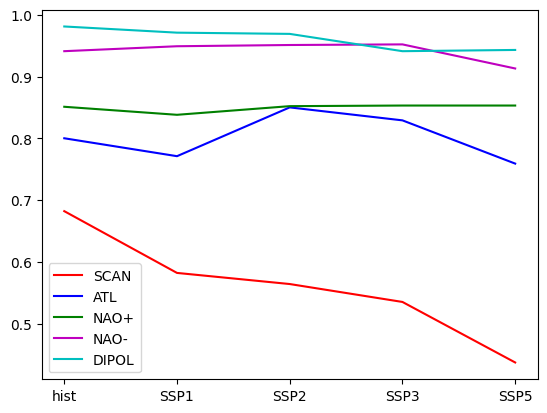

In [14]:
import matplotlib.pyplot as plt
scan=[0.682, 0.582, 0.564, 0.535, 0.437]
atl= [0.80, 0.771,  0.850, 0.829, 0.759 ]
naoplus= [0.851,0.838, 0.852, 0.853, 0.853]
naominus=[0.941, 0.949, 0.951, 0.952, 0.913]
dipol=[0.981, 0.971, 0.969, 0.941, 0.943 ]
x=["hist", "SSP1", "SSP2", "SSP3", "SSP5"]
plt.plot(x,scan,"-",color="r",label="SCAN")
plt.plot(x,atl,"-",color="b",label="ATL")
plt.plot(x,naoplus,"-",color="g",label="NAO+")
plt.plot(x,naominus,"-",color="m",label="NAO-")
plt.plot(x,dipol,"-",color="c",label="DIPOL")
plt.legend()